<a href="https://colab.research.google.com/github/manasivariar/Coin-Market-predicition-/blob/main/GKIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries and packages which we'll need.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import scipy
import pickle
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

We'll load the csv dataset

In [ ]:
content = pd.read_csv('/content/drive/MyDrive/GK IS/coin_summary_batch-20210415-122130.csv')

Checking if the dataset is loaded properly or not

In [ ]:
content.head()

We can see, there are a 40 columns and 496482 rows of which, 'links_in_count' is all NaN. Hence, we can drop it.

In [ ]:
content.info()

Further describing the dataset, we can see few features have very high range of values.

In [ ]:
content.describe()

In [ ]:
content.corr()

We can see, only few features are related to the target variable (market_cap). Hence we'll only keep those features.

In [ ]:
df = content[['name', 'days_added_since', 'page_views_per_user_value_days_1', 'price_usd', 'volume_24h', 'num_market_pairs', 'market_cap']]

As the name column consist of string data, we need to labelize them into number. Therefore, we'll use label encoder to achieve this.

In [ ]:
le=LabelEncoder()
df['name'] = le.fit_transform(df['name'].astype('str'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now as we can see, the data are all numeric now.

In [ ]:
df.head()

Let us now check if any null values are present in our data

In [ ]:
df.isnull().sum()

name                                0
days_added_since                    0
page_views_per_user_value_days_1    0
price_usd                           0
volume_24h                          0
num_market_pairs                    0
market_cap                          0
dtype: int64

In [ ]:
df.isna().sum()

name                                0
days_added_since                    0
page_views_per_user_value_days_1    0
price_usd                           0
volume_24h                          0
num_market_pairs                    0
market_cap                          0
dtype: int64

Checking if any values in days_added_since are less than 0, since days cannot be negative. 

In [ ]:
df[df["days_added_since"]<0].count()

name                                4
days_added_since                    4
page_views_per_user_value_days_1    4
price_usd                           4
volume_24h                          4
num_market_pairs                    4
market_cap                          4
dtype: int64

As we saw, we have 4 data which are incorrect. Hence, we'll remove them.

In [ ]:
df = df.where(df['days_added_since'] >= 0)

Similarly we'll check if market_cap is negative or not and remove any such data, if present

In [ ]:
df[df["market_cap"]<0].count()

name                                4
days_added_since                    4
page_views_per_user_value_days_1    4
price_usd                           4
volume_24h                          4
num_market_pairs                    4
market_cap                          4
dtype: int64

In [ ]:
df = df.where(df['market_cap'] >= 0)

We'll again check if any NaN/null values are present or not

In [ ]:
df.isna().sum()

name                                8
days_added_since                    8
page_views_per_user_value_days_1    8
price_usd                           8
volume_24h                          8
num_market_pairs                    8
market_cap                          8
dtype: int64

We observe, there are total 8 NaN values, hence we'll drop them.

In [ ]:
df.dropna(inplace=True)

There are no NaN values now.

In [ ]:
df.isna().sum()

name                                0
days_added_since                    0
page_views_per_user_value_days_1    0
price_usd                           0
volume_24h                          0
num_market_pairs                    0
market_cap                          0
dtype: int64

In [ ]:
df.describe()

,name,days_added_since,page_views_per_user_value_days_1,price_usd,volume_24h,num_market_pairs,market_cap
count,496474.000000,496474.000000,496474.000000,496474.000000,4.964740e+05,496474.000000,4.964740e+05
mean,2566.217288,581.613931,0.859598,340.798275,7.104755e+07,15.144038,3.334784e+08
std,1494.149498,583.675708,2.192857,4515.006772,2.128888e+09,243.776157,1.366618e+10
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1276.000000,140.000000,0.000000,0.003065,5.290236e+01,1.000000,1.000701e+04
50%,2556.000000,337.000000,0.000000,0.046461,1.954393e+04,2.000000,2.824047e+05
75%,3862.000000,923.000000,1.000000,0.999643,4.237739e+05,5.000000,4.494830e+06
max,5164.000000,2909.000000,100.000000,214125.996424,3.509679e+11,12096.000000,1.186364e+12


Now let's plot the heatmap to properly visualise the correlation between the variables.

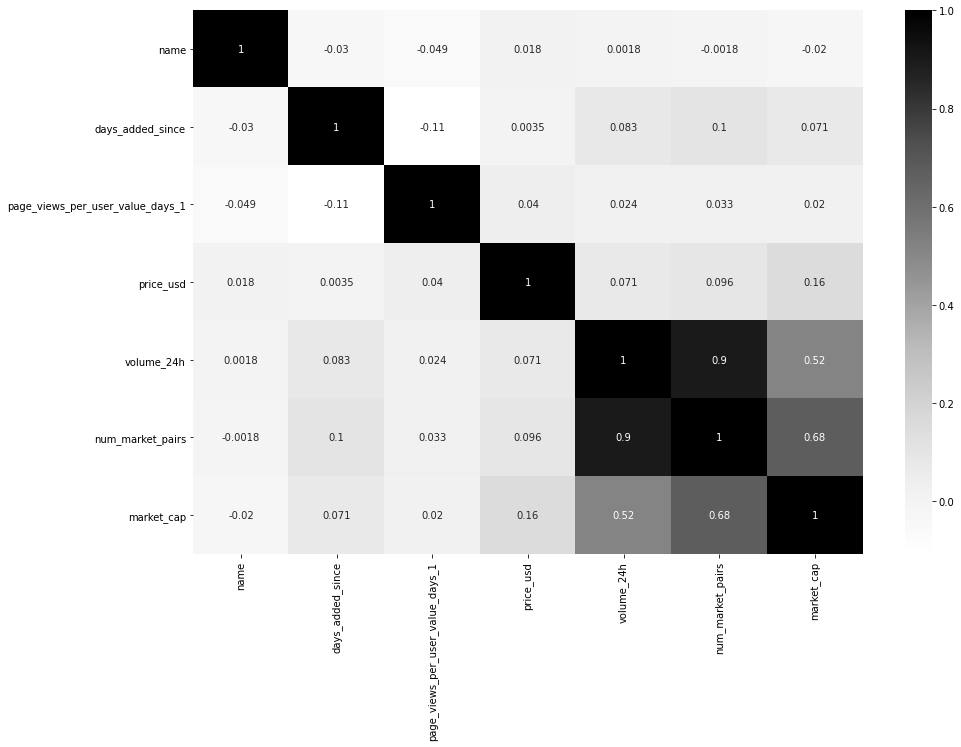

In [ ]:
fig, ax = plot.subplots(figsize = (15,10))
sns.heatmap(df.corr(), cmap="Greys", annot = True)

As we can see, volume_24h and num_market_pairs are highly correlated to the target variable

Now plotting the boxplot, we observe that as the values are in high range, many values might be treated as outliers even though they are not.

In [ ]:
for i in ['price_usd', 'volume_24h', 'num_market_pairs']:
    sns.boxplot(df[i])
    print("Skew value: ", df[i].skew())
    plot.title(i)
    plot.show()

To normalise the data, we'll replace the value with it's cube root.

In [ ]:
df['volume_24h']=np.cbrt(df.volume_24h)

In [ ]:
df['market_cap']=np.cbrt(df.market_cap)

We can see, the range is reduced now

In [ ]:
df.describe()

,name,days_added_since,page_views_per_user_value_days_1,price_usd,volume_24h,num_market_pairs,market_cap
count,496474.000000,496474.000000,496474.000000,496474.000000,496474.000000,496474.000000,496474.000000
mean,2566.217288,581.613931,0.859598,340.798275,72.313460,15.144038,145.642189
std,1494.149498,583.675708,2.192857,4515.006772,177.900194,243.776157,289.230924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1276.000000,140.000000,0.000000,0.003065,3.753978,1.000000,21.549380
50%,2556.000000,337.000000,0.000000,0.046461,26.936261,2.000000,65.608073
75%,3862.000000,923.000000,1.000000,0.999643,75.112360,5.000000,165.033115
max,5164.000000,2909.000000,100.000000,214125.996424,7053.789298,12096.000000,10586.181246


Seperating the target variable from the dataset

In [ ]:
X = df.drop("market_cap", axis=1)
y = df['market_cap']

Splitting the data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.3)

As the target variable is continous, we make use of different regression models to predict.

# Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions_test = lin_reg.predict(X_test)
predictions_train = lin_reg.predict(X_train)

In [ ]:
lin_reg.score(X_test, y_test)

0.735324549190525

In [ ]:
print(metrics.mean_absolute_error(y_test, predictions_test))
print(metrics.mean_squared_error(y_test, predictions_test))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

73.13084317684526
22911.43660049538
151.3652423791386


# Ridge Regression

Referred from: https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg = Ridge(alpha=0.0001,normalize=True)

In [ ]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred = ridge_reg.predict(X_test)

In [ ]:
ridge_reg.score(X_test, y_test)

0.7353268771949577

In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

73.1345482376623
22911.235078496247
151.36457669645247


# Lasso Regression

Referred from: https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lassoreg = Lasso(alpha=0.0001,normalize=True, max_iter=1e5)

In [ ]:
lassoreg.fit(X_train, y_train)

In [ ]:
y_pred = lassoreg.predict(X_test)

In [ ]:
lassoreg.score(X_test, y_test)

In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Polynomial Regression

Referred from: https://www.kaggle.com/rahulkadam0909/polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lin2.predict(poly.fit_transform(X_test))

In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

67.65212704494394
40419.111747239476
201.04504904931002


# Neural Networks

Referred from: https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [ ]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
cp_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
cp = ModelCheckpoint(cp_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
cb_list = [cp]

In [ ]:
NN_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2, callbacks=cb_list)

In [ ]:
y_pred = NN_model.predict(X_test)
y_train_pred = NN_model.predict(X_train)

In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

51.914569558043446
12031.298505277848
109.68727594975566


In [ ]:
print(metrics.mean_absolute_error(y_train, y_train_pred))
print(metrics.mean_squared_error(y_train, y_train_pred))
print(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

51.79919222139175
11876.207843420263
108.97801541329454


# Conclusion

We made use of various regression and NN models to predict our target variable. We observed that Linear, Lasso, and Ridge performed similarly. NN performed best among all.